In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import re
import pandas as pd

def parse_panther_text(path: str) -> pd.DataFrame:
    rows = []
    with open(path, "r", encoding="utf-8", errors="ignore") as f:
        for line in f:
            line = line.strip()
            # skip empty/service lines
            if not line or line.startswith("Analysis Type") or line.startswith("Annotation") or line.startswith("Analyzed List"):
                continue

            # We take only the lines that contain GO:xxxxxxx
            if "(GO:" not in line:
                continue

            # split by any spaces
            parts = re.split(r"\s+", line)

          
            go_idx = next((i for i,p in enumerate(parts) if p.startswith("(GO:")), None)
            if go_idx is None:
                continue

            term = " ".join(parts[:go_idx]) + " " + parts[go_idx]  # включая (GO:...)
            tail = parts[go_idx+1:]

           
            if len(tail) < 6:
                continue

            # The last 3 are fold, rawP, FDR
            try:
                fdr = float(tail[-1].replace("E","e"))
                rawp = float(tail[-2].replace("E","e"))
                fold = float(tail[-3].replace("E","e"))
            except:
                continue

            rows.append({"term": term, "fold_enrichment": fold, "raw_p": rawp, "FDR": fdr})

    return pd.DataFrame(rows)

size2 = parse_panther_text("PANTHER_size2_GO.txt")
size10 = parse_panther_text("PANTHER_sizeGE10_GO.txt")

size2.head(), size2.shape


(                                                term  fold_enrichment  \
 0      energy reserve metabolic process (GO:0006112)             8.44   
 1            glycogen metabolic process (GO:0005977)             8.44   
 2  mitochondrial electron transport, ubiquinol to...             7.38   
 3                             mitophagy (GO:0000423)             7.23   
 4   protein K48-linked deubiquitination (GO:0071108)             6.75   
 
       raw_p       FDR  
 0  0.001660  0.016500  
 1  0.001660  0.016400  
 2  0.000002  0.000067  
 3  0.000017  0.000418  
 4  0.000891  0.009970  ,
 (203, 4))

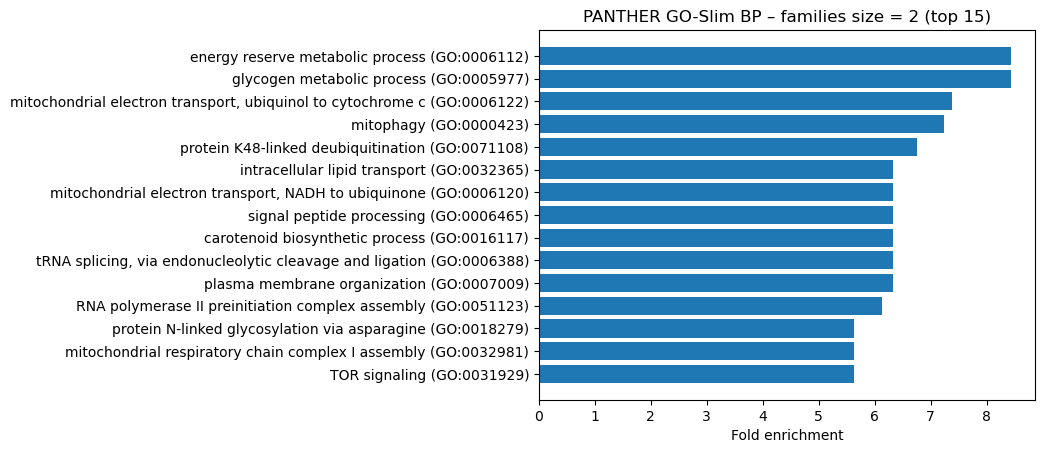

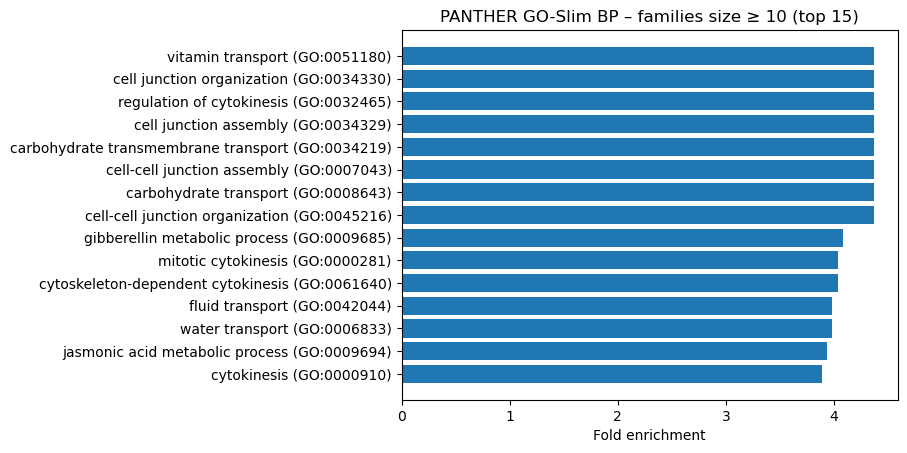

In [6]:
import matplotlib.pyplot as plt

def top_terms(df, n=15):
    return df[df["FDR"] < 0.05].sort_values("fold_enrichment", ascending=False).head(n)

s2 = top_terms(size2, 15)
s10 = top_terms(size10, 15)

plt.figure()
plt.barh(s2["term"], s2["fold_enrichment"])
plt.xlabel("Fold enrichment")
plt.title("PANTHER GO-Slim BP – families size = 2 (top 15)")
plt.gca().invert_yaxis()
plt.show()

plt.figure()
plt.barh(s10["term"], s10["fold_enrichment"])
plt.xlabel("Fold enrichment")
plt.title("PANTHER GO-Slim BP – families size ≥ 10 (top 15)")
plt.gca().invert_yaxis()
plt.show()
